In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme(style="whitegrid", palette="Set2", color_codes=True)

In [22]:
df_com_3_test = pd.read_csv("results/csvs/com_ajusto_fino_3_epochs_measures_test.csv", index_col=0)
df_com_3_covid = pd.read_csv("results/csvs/com_ajusto_fino_3_epochs_measures_covid.csv", index_col=0)
df_com_3_custom = pd.read_csv("results/csvs/com_ajusto_fino_3_epochs_measures_custom.csv", index_col=0)

df_com_5_test = pd.read_csv("results/csvs/com_ajusto_fino_5_epochs_measures_test.csv", index_col=0)
df_com_5_covid = pd.read_csv("results/csvs/com_ajusto_fino_5_epochs_measures_covid.csv", index_col=0)
df_com_5_custom = pd.read_csv("results/csvs/com_ajusto_fino_5_epochs_measures_custom.csv", index_col=0)

df_sem_3_test = pd.read_csv("results/csvs/sem_ajusto_fino_3_epochs_measures_test.csv", index_col=0)
df_sem_3_covid = pd.read_csv("results/csvs/sem_ajusto_fino_3_epochs_measures_covid.csv", index_col=0)
df_sem_3_custom = pd.read_csv("results/csvs/sem_ajusto_fino_3_epochs_measures_custom.csv", index_col=0)

df_sem_5_test = pd.read_csv("results/csvs/sem_ajusto_fino_5_epochs_measures_test.csv", index_col=0)
df_sem_5_covid = pd.read_csv("results/csvs/sem_ajusto_fino_5_epochs_measures_covid.csv", index_col=0)
df_sem_5_custom = pd.read_csv("results/csvs/sem_ajusto_fino_5_epochs_measures_custom.csv", index_col=0)

In [40]:
df_com_3_full = pd.concat([df_com_3_test, df_com_3_covid, df_com_3_custom])
df_com_3_full.index = ["test", "covid", "custom"]

df_com_5_full = pd.concat([df_com_5_test, df_com_5_covid, df_com_5_custom])
df_com_5_full.index = ["test", "covid", "custom"]

df_sem_3_full = pd.concat([df_sem_3_test, df_sem_3_covid, df_sem_3_custom])
df_sem_3_full.index = ["test", "covid", "custom"]

df_sem_5_full = pd.concat([df_sem_5_test, df_sem_5_covid, df_sem_5_custom])
df_sem_5_full.index = ["test", "covid", "custom"]

In [54]:
def show_accucaracy_comparasion(df_plot: pd.DataFrame, title: str = None, ax: plt.Axes = None):
    df_plot = df_plot.reset_index()
    df_plot.rename(columns={"index": "dataset"}, inplace=True)
    df_plot = df_plot.melt(id_vars=["dataset"], var_name="metric", value_name="accuracys")

    sns.set_theme(style="whitegrid", palette="Set2", color_codes=True)

    if not ax:
    # Initialize the matplotlib figure
        f, ax = plt.subplots(figsize=(6, 4))

    # Plot the total crashes
    sns.barplot(x="dataset", y="accuracys", hue="metric", data=df_plot, ax=ax)

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fmt='%1.2f', color='black', size=8)

    # Add a legend and informative axis label
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
            fancybox=True, shadow=True, ncol=4)

    ax.set_ylim(0, 1)
    ax.set_title(title)
    return ax

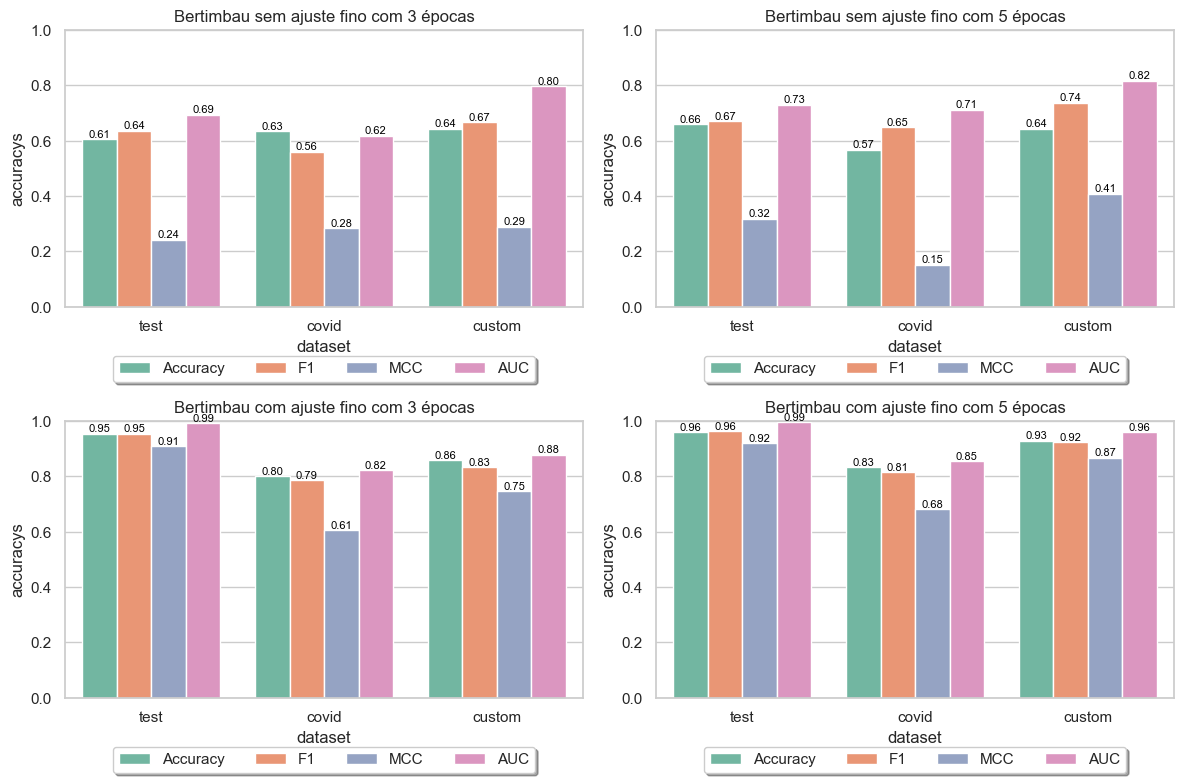

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

show_accucaracy_comparasion(df_sem_3_full[["Accuracy","F1", "MCC", "AUC"]], "BERTimbau sem ajuste fino com 3 épocas", axes[0])
show_accucaracy_comparasion(df_sem_5_full[["Accuracy","F1", "MCC", "AUC"]], "BERTimbau sem ajuste fino com 5 épocas", axes[1])
show_accucaracy_comparasion(df_com_3_full[["Accuracy","F1", "MCC", "AUC"]], "BERTimbau com ajuste fino com 3 épocas", axes[2])
show_accucaracy_comparasion(df_com_5_full[["Accuracy","F1", "MCC", "AUC"]], "BERTimbau com ajuste fino com 5 épocas", axes[3])

plt.tight_layout()
plt.show()

In [ ]:
# df_com_3_stats = pd.read_csv("results/csvs/com_ajusto_fino_3_epochs_stats.csv", index_col=0)
# df_com_5_stats = pd.read_csv("results/csvs/com_ajusto_fino_5_epochs_stats.csv", index_col=0)
# df_sem_3_stats = pd.read_csv("results/csvs/sem_ajusto_fino_3_epochs_stats.csv", index_col=0)
# df_sem_5_stats = pd.read_csv("results/csvs/sem_ajusto_fino_5_epochs_stats.csv", index_col=0)

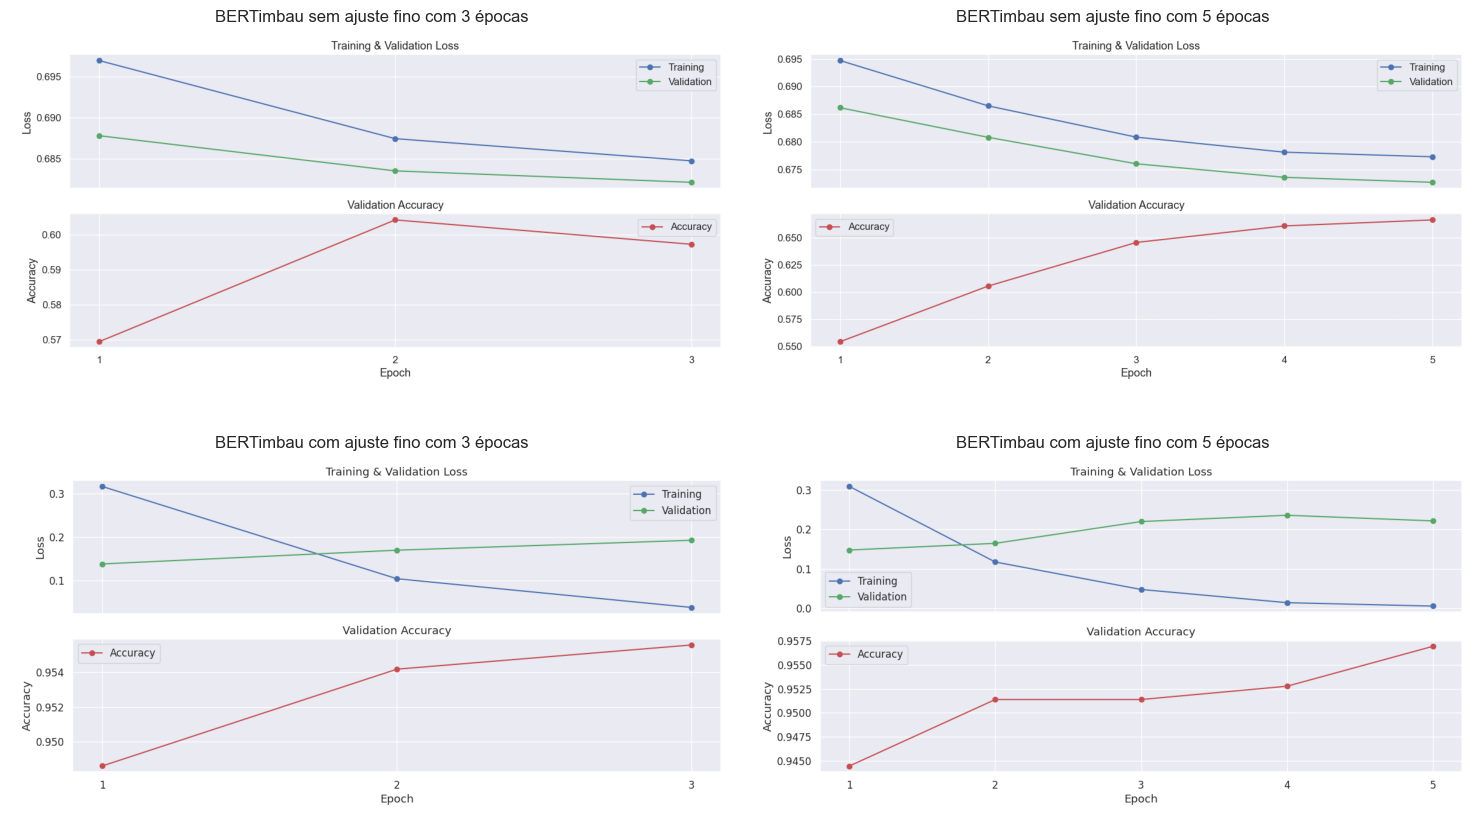

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
axes = axes.flatten()

for ax in axes:
    ax.axis('off')
#    ax.set_aspect('auto')

#show images in axes
axes[0].imshow(plt.imread("results/images/sem_ajusto_fino_3_epochs_training.png"))
axes[0].set_title("BERTimbau sem ajuste fino com 3 épocas", size=12)

axes[1].imshow(plt.imread("results/images/sem_ajusto_fino_5_epochs_training.png"))
axes[1].set_title("BERTimbau sem ajuste fino com 5 épocas", size=12)

axes[2].imshow(plt.imread("results/images/com_ajusto_fino_3_epochs_training.png"))
axes[2].set_title("BERTimbau com ajuste fino com 3 épocas", size=12)

axes[3].imshow(plt.imread("results/images/com_ajusto_fino_5_epochs_training.png"))
axes[3].set_title("BERTimbau com ajuste fino com 5 épocas", size=12)

plt.tight_layout()
plt.show()

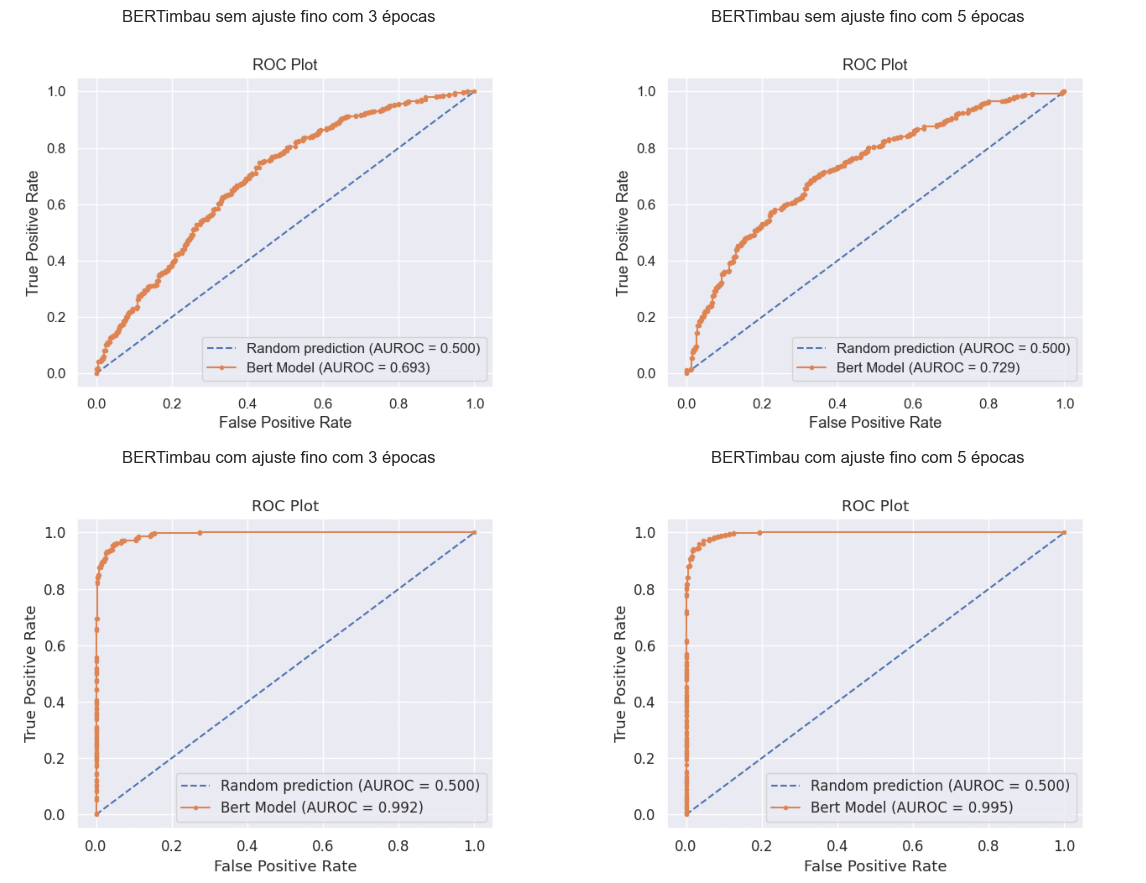

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()

for ax in axes:
    ax.axis('off')
#    ax.set_aspect('auto')

#show images in axes
axes[0].imshow(plt.imread("results/images/sem_ajusto_fino_3_epochs_roc_test.png"))
axes[0].set_title("BERTimbau sem ajuste fino com 3 épocas", size=12)

axes[1].imshow(plt.imread("results/images/sem_ajusto_fino_5_epochs_roc_test.png"))
axes[1].set_title("BERTimbau sem ajuste fino com 5 épocas", size=12)

axes[2].imshow(plt.imread("results/images/com_ajusto_fino_3_epochs_roc_test.png"))
axes[2].set_title("BERTimbau com ajuste fino com 3 épocas", size=12)

axes[3].imshow(plt.imread("results/images/com_ajusto_fino_5_epochs_roc_test.png"))
axes[3].set_title("BERTimbau com ajuste fino com 5 épocas", size=12)

plt.tight_layout()
plt.show()

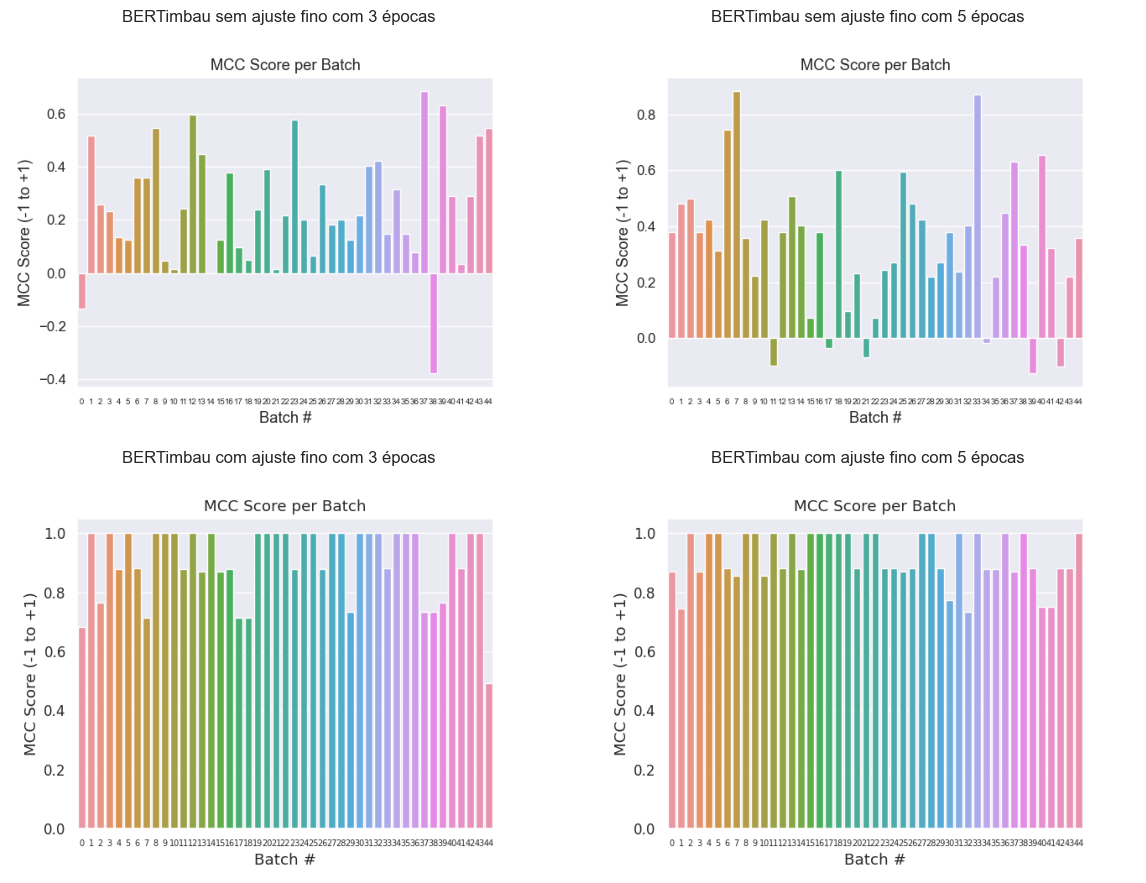

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()

for ax in axes:
    ax.axis('off')
#    ax.set_aspect('auto')

#show images in axes
axes[0].imshow(plt.imread("results/images/sem_ajusto_fino_3_epochs_mcc.png"))
axes[0].set_title("BERTimbau sem ajuste fino com 3 épocas", size=12)

axes[1].imshow(plt.imread("results/images/sem_ajusto_fino_5_epochs_mcc.png"))
axes[1].set_title("BERTimbau sem ajuste fino com 5 épocas", size=12)

axes[2].imshow(plt.imread("results/images/com_ajusto_fino_3_epochs_mcc.png"))
axes[2].set_title("BERTimbau com ajuste fino com 3 épocas", size=12)

axes[3].imshow(plt.imread("results/images/com_ajusto_fino_5_epochs_mcc.png"))
axes[3].set_title("BERTimbau com ajuste fino com 5 épocas", size=12)

plt.tight_layout()
plt.show()